Proyecto 1

El objetivo de este proyecto es crear modelos predictivos de regresion lineal univariable de la forma y= Bo+B1*x
En donde y es la variable independiente
x es la variable dependiente
Beta cero es el intercepto de la recta
Beta uno es la pendiente de la recta. 


In [2]:
#Paso 1. Carga de las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Paso 2. Carga del Archivo Binario
data= np.load('proyecto_training_data.npy')


In [6]:
dataset = pd.DataFrame (data, 
            columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [7]:
#Visualizacion de la data
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Paso 3. Revisamos los datos faltantes y hacemos la imputación de la media a los datos null. Luego dividimos la data el 80% del dataset se utilizara para entrenar el modelo, es decir el analisis exploratorio, seleccion de variables a utilizar, creacion de los modelos predictivos. Este data set se llamara "datatrain". El 20% restante se usara al final para validacion y pruebas del modelo.

In [20]:
cols_to_use= ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

In [21]:
print(dataset.shape)

(1460, 6)


Revisamos que columnas tienen datos NA para hacer la imputación de la media

In [13]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [16]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

['LotFrontage']

In [17]:
dataset[cols_con_nan].dtypes

LotFrontage    float64
dtype: object

In [18]:
dataset[cols_con_nan].isnull().mean()

LotFrontage    0.177397
dtype: float64

In [19]:
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [30]:
#Imputacion de la Media
meanValue = np.round(dataset['LotFrontage'].mean(), 0)
meanValue


70.0

In [27]:
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValue)

In [29]:
#Imputacion de la mediana
medianValue = np.round(dataset['LotFrontage'].median(), 0)
medianValue

69.0

In [31]:
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValue)

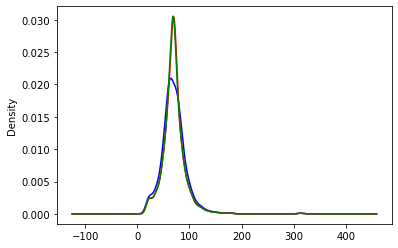

In [34]:
fig = plt.figure()
fig.add_subplot(111)

dataset['LotFrontage'].plot.density(color="blue")
dataset_FL_meanImp.plot.density(color="red")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [35]:
#Revisamos el coeficiente de correlacion con la variable SalePrice
np.corrcoef(dataset_FL_meanImp, dataset['SalePrice'])[0,1]

0.33489718326981494

In [37]:
np.corrcoef(dataset_FL_medianImp, dataset['SalePrice'])[0,1]

0.33477085313975996

Se revisó y la correlacion al realizar la imputacion con la media y la mediana no varía mucho, la media para la columna LotFrontage es 69 y la mediana 70, es decir no se aleja significativamente de la media. En este caso se tomará la media para la imputación de los datos faltantes y continuar con el procedimiento de predicción de datos.